In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..')))
import pymatgen.io.cif as cif
from tqdm import tqdm

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
%load_ext autoreload
%autoreload 2
import src.spectra as spectra

In [ ]:
df = pd.read_csv('/Users/tphung/Dropbox (MIT)/repos/pyspectra/analyses/csd_AgS_bispectra_lmax_4_radius3.1_cutoff.csv')

Text(0, 0.5, 'Second Principal Component')

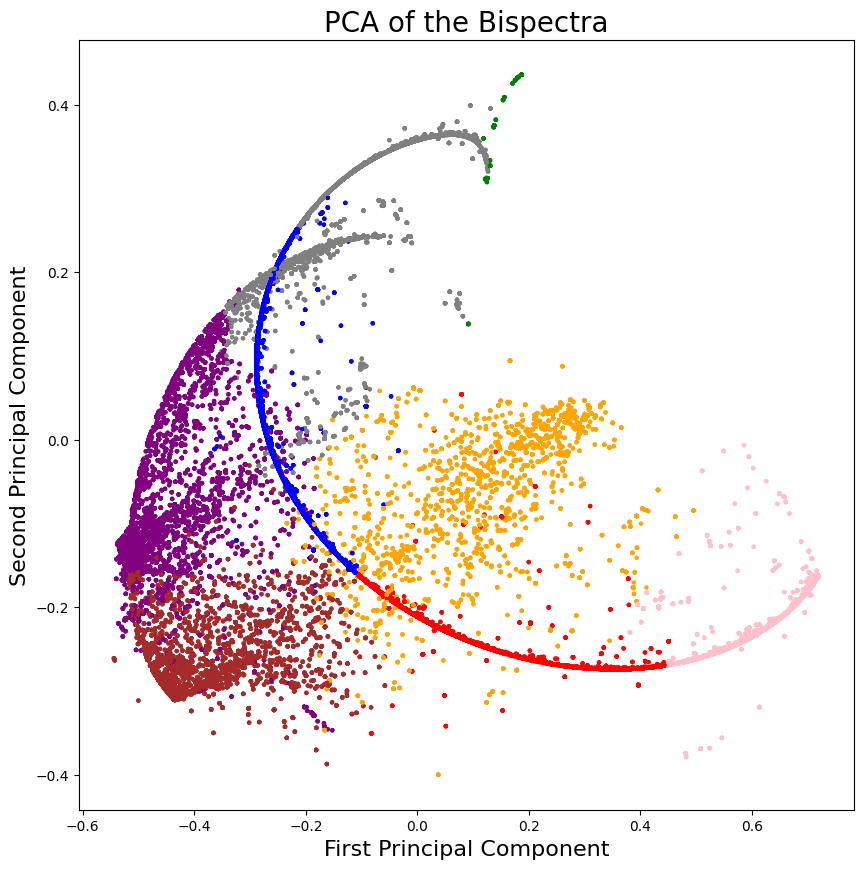

In [73]:
spectra_data = list(df.bispectrum.apply(eval))
for i in range(len(spectra_data)):
    spectra_data[i] = spectra_data[i] / np.linalg.norm(spectra_data[i])

kmeans = KMeans(n_clusters=8, n_init=10, random_state=0).fit(spectra_data)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(spectra_data)

colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray']
color_labels = [colors[label] for label in kmeans.labels_]

plt.figure(figsize=(10, 10))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=color_labels, s=5)
plt.title('PCA of the Bispectra', fontsize=20)
plt.xlabel('First Principal Component', fontsize=16)
plt.ylabel('Second Principal Component', fontsize=16)

# manifold learning

  0%|          | 0/7 [00:00<?, ?it/s]

3amino_a.cif


 29%|██▊       | 2/7 [00:00<00:01,  3.56it/s]

glu3_rtr.cif
mithrene.cif


 57%|█████▋    | 4/7 [00:00<00:00,  5.68it/s]

2amino_one_layer.cif
3methoxy_a.cif


100%|██████████| 7/7 [00:01<00:00,  6.17it/s]

4methoxy_b.cif
2amino_rtr.cif


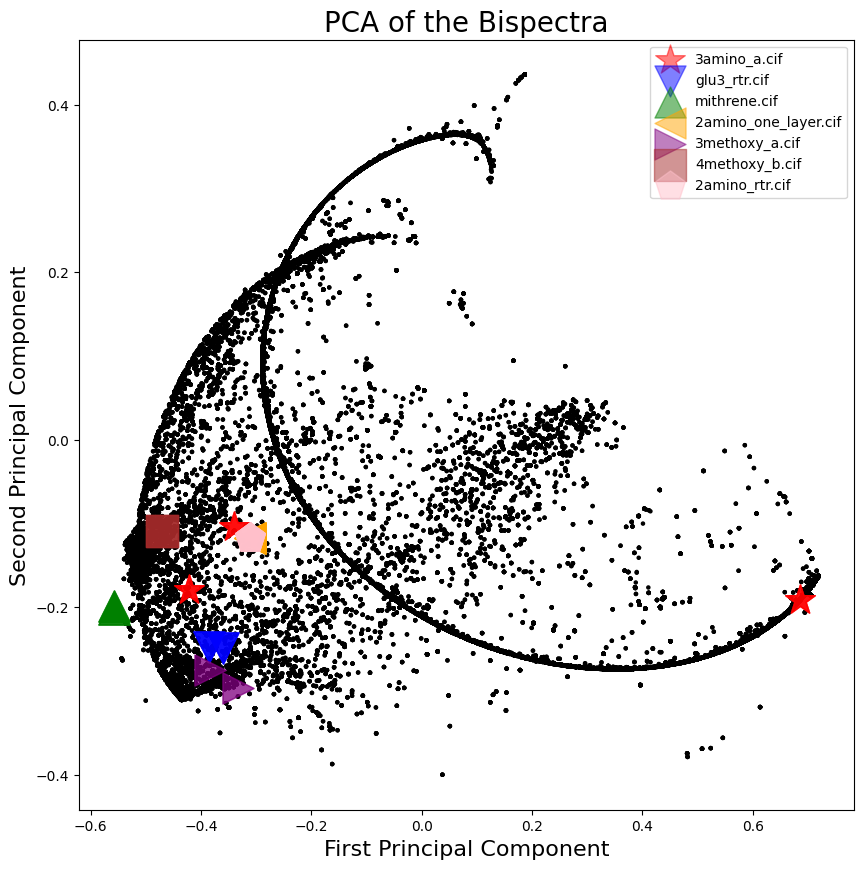

In [71]:
spectra_data = list(df.bispectrum.apply(eval))
for i in range(len(spectra_data)):
    spectra_data[i] = spectra_data[i] / np.linalg.norm(spectra_data[i])

kmeans = KMeans(n_clusters=8, n_init=10, random_state=0).fit(spectra_data)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(spectra_data)

colors = ['black'] * 8
color_labels = [colors[label] for label in kmeans.labels_]

plt.figure(figsize=(10, 10))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=color_labels, s=5)
plt.title('PCA of the Bispectra', fontsize=20)
plt.xlabel('First Principal Component', fontsize=16)
plt.ylabel('Second Principal Component', fontsize=16)

bispectrum = spectra.Spectra(lmax=4, order=2, neighbors=["S", "Se", "Te"], cutoff=spectra.radial_cutoff(radius=3.1))
os.chdir('/Users/tphung/Dropbox (MIT)/repos/pyspectra/cifs/mochas/')
cif_filenames = os.listdir()
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray']
markers = ['*', 'v', '^', '<', '>', 's', 'p', 'o']
legend_labels = set()
for i, cif_filename in enumerate(tqdm(cif_filenames)):
    print(cif_filename)
    cif_filepath = os.path.join(os.getcwd(), cif_filename)
    bispectrum.load_cif(cif_filepath)
    structure = bispectrum.get_structure()
    ag_sites = [i for i, site in enumerate(structure) if site.species_string == "Ag"]
    color = colors[i % len(colors)]
    marker = markers[i % len(markers)]
    for ag_site in ag_sites:
        bispectrum.load_cif(cif_filepath)
        spectrum = bispectrum.compute_atom_spectra(ag_site)
        if spectrum is not None:
            spectrum = spectrum / np.linalg.norm(spectrum)
            pca_result = pca.transform([spectrum])[0]
            plt.scatter(pca_result[0], pca_result[1], marker=marker, s=500, alpha=0.5, color=color)  # Increased size from 200 to 500
            if color not in legend_labels:
                plt.scatter([], [], marker=marker, s=500, alpha=0.5, label=f"{cif_filename}", color=color)  # Increased size from 200 to 500
                legend_labels.add(color)
plt.legend()  # Added this line to show the legend


In [121]:
from sklearn import manifold

spectra_data = list(df.bispectrum.apply(eval))
for i in range(len(spectra_data)):
    spectra_data[i] = spectra_data[i] / np.linalg.norm(spectra_data[i])

spectra_data = np.array(spectra_data)  # Convert list to numpy array

kmeans = KMeans(n_clusters=8, n_init=10, random_state=0).fit(spectra_data)
tsne = manifold.TSNE(n_components=2)
tsne_result = tsne.fit_transform(spectra_data)

colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray']
color_labels = [colors[label] for label in kmeans.labels_]

plt.figure(figsize=(10, 10))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=color_labels, s=5)
plt.title('t-SNE of the Bispectra', fontsize=20)
plt.xlabel('First t-SNE Dimension', fontsize=16)
plt.ylabel('Second t-SNE Dimension', fontsize=16)


KeyboardInterrupt: 

In [124]:
from sklearn.cluster import DBSCAN

spectra_data = list(df.bispectrum.apply(eval))
for i in range(len(spectra_data)):
    spectra_data[i] = spectra_data[i] / np.linalg.norm(spectra_data[i])

db = DBSCAN(eps=0.1, min_samples=10).fit(spectra_data)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)


Estimated number of clusters: 46
Estimated number of noise points: 1176


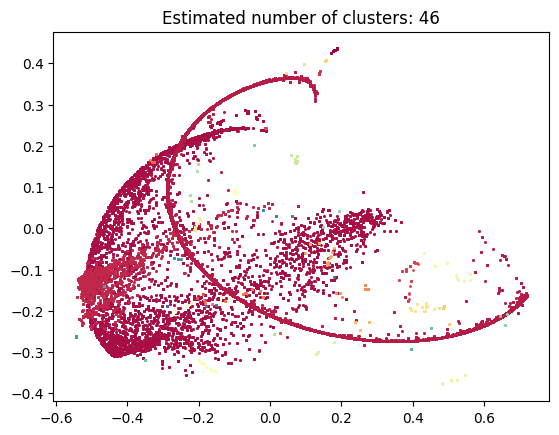

In [128]:
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = pca_result[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor=tuple(col),  # Change marker edge color to match face color for visibility
        markersize=1,
    )


plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()


In [126]:
from collections import Counter

cluster_counts = Counter(labels)
for cluster, count in cluster_counts.items():
    print(f"Cluster {cluster}: {count} entries")


Cluster 0: 10109 entries
Cluster 1: 19609 entries
Cluster 2: 28647 entries
Cluster 3: 4886 entries
Cluster 4: 28 entries
Cluster 5: 62 entries
Cluster -1: 1176 entries
Cluster 6: 72 entries
Cluster 7: 16 entries
Cluster 8: 24 entries
Cluster 40: 18 entries
Cluster 9: 16 entries
Cluster 10: 36 entries
Cluster 11: 16 entries
Cluster 12: 10 entries
Cluster 13: 29 entries
Cluster 14: 18 entries
Cluster 15: 76 entries
Cluster 16: 14 entries
Cluster 17: 10 entries
Cluster 21: 12 entries
Cluster 22: 12 entries
Cluster 18: 10 entries
Cluster 19: 156 entries
Cluster 20: 78 entries
Cluster 23: 48 entries
Cluster 24: 64 entries
Cluster 25: 16 entries
Cluster 26: 58 entries
Cluster 27: 28 entries
Cluster 28: 32 entries
Cluster 44: 18 entries
Cluster 29: 10 entries
Cluster 30: 48 entries
Cluster 31: 24 entries
Cluster 32: 16 entries
Cluster 33: 10 entries
Cluster 34: 10 entries
Cluster 35: 18 entries
Cluster 36: 24 entries
Cluster 37: 24 entries
Cluster 38: 24 entries
Cluster 39: 36 entries
Cluster

In [ ]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(spectra_data)

colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray']
color_labels = [colors[label] if label != -1 else 'black' for label in dbscan.labels_]

plt.figure(figsize=(10, 10))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=color_labels, s=5)
plt.title('PCA of the Bispectra', fontsize=20)
plt.xlabel('First Principal Component', fontsize=16)
plt.ylabel('Second Principal Component', fontsize=16)

In [ ]:
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, 10)]

[(0.6196078431372549, 0.00392156862745098, 0.25882352941176473, 1.0),
 (0.8472126105344099, 0.2612072279892349, 0.30519031141868513, 1.0),
 (0.9637831603229527, 0.47743175701653207, 0.28581314878892733, 1.0),
 (0.9934640522875817, 0.7477124183006535, 0.4352941176470587, 1.0),
 (0.9977700884275279, 0.930872741253364, 0.6330642060745867, 1.0),
 (0.944252210688197, 0.9777008842752788, 0.6620530565167244, 1.0),
 (0.7477124183006538, 0.8980392156862746, 0.6274509803921569, 1.0),
 (0.4530565167243369, 0.7815455594002307, 0.6462898885044214, 1.0),
 (0.21607074202229912, 0.5556324490580546, 0.7319492502883507, 1.0),
 (0.3686274509803922, 0.30980392156862746, 0.6352941176470588, 1.0)]